In [28]:
import pandas as pd

# Importa il dataset
df = pd.read_csv("master.csv")  

# Stampa le prime 15 righe
print(df.head(15))

    country  year     sex          age  suicides_no  population  \
0   Albania  1987    male  15-24 years           21      312900   
1   Albania  1987    male  35-54 years           16      308000   
2   Albania  1987  female  15-24 years           14      289700   
3   Albania  1987    male    75+ years            1       21800   
4   Albania  1987    male  25-34 years            9      274300   
5   Albania  1987  female    75+ years            1       35600   
6   Albania  1987  female  35-54 years            6      278800   
7   Albania  1987  female  25-34 years            4      257200   
8   Albania  1987    male  55-74 years            1      137500   
9   Albania  1987  female   5-14 years            0      311000   
10  Albania  1987  female  55-74 years            0      144600   
11  Albania  1987    male   5-14 years            0      338200   
12  Albania  1988  female    75+ years            2       36400   
13  Albania  1988    male  15-24 years           17      31920

In [29]:
# Mostra le informazioni sul dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [30]:
# Conta i valori nulli per ogni colonna
null_counts = df.isnull().sum()

# Stampa i risultati
print(null_counts)

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [31]:
import numpy as np

def age_to_midpoint(x):
    x = x.strip()  # sicurezza contro spazi
    if "+" in x:
        # gestisce "75+ years"
        base = int(x.split("+")[0])
        return base + 5  
    else:
        # gestisce "25-34 years"
        low, high = x.replace(" years", "").split("-")
        return (int(low) + int(high)) / 2

# Applichiamo la trasformazione direttamente a df["age"]
df["age"] = df["age"].apply(age_to_midpoint)

# Stampa le prime 15 righe
print(df.head(15))


    country  year     sex   age  suicides_no  population  suicides/100k pop  \
0   Albania  1987    male  19.5           21      312900               6.71   
1   Albania  1987    male  44.5           16      308000               5.19   
2   Albania  1987  female  19.5           14      289700               4.83   
3   Albania  1987    male  80.0            1       21800               4.59   
4   Albania  1987    male  29.5            9      274300               3.28   
5   Albania  1987  female  80.0            1       35600               2.81   
6   Albania  1987  female  44.5            6      278800               2.15   
7   Albania  1987  female  29.5            4      257200               1.56   
8   Albania  1987    male  64.5            1      137500               0.73   
9   Albania  1987  female   9.5            0      311000               0.00   
10  Albania  1987  female  64.5            0      144600               0.00   
11  Albania  1987    male   9.5            0      33

In [32]:
#Elimino la colonna country Hears in quanto ridondante. Abbiamo gia country e year separati
df = df.drop(columns=["country-year"])
print(df.head(15))

    country  year     sex   age  suicides_no  population  suicides/100k pop  \
0   Albania  1987    male  19.5           21      312900               6.71   
1   Albania  1987    male  44.5           16      308000               5.19   
2   Albania  1987  female  19.5           14      289700               4.83   
3   Albania  1987    male  80.0            1       21800               4.59   
4   Albania  1987    male  29.5            9      274300               3.28   
5   Albania  1987  female  80.0            1       35600               2.81   
6   Albania  1987  female  44.5            6      278800               2.15   
7   Albania  1987  female  29.5            4      257200               1.56   
8   Albania  1987    male  64.5            1      137500               0.73   
9   Albania  1987  female   9.5            0      311000               0.00   
10  Albania  1987  female  64.5            0      144600               0.00   
11  Albania  1987    male   9.5            0      33

In [33]:
# Mostra le informazioni sul dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  float64
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   HDI for year        8364 non-null   float64
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 2.3+ MB


In [34]:
# 1. Rinomina la colonna (toglie lo spazio iniziale e il nome scomodo)
df = df.rename(columns={' gdp_for_year ($) ': "gdp_for_year_usd"})

# 2. Rimuove le virgole e converte in numero intero
df["gdp_for_year_usd"] = (
    df["gdp_for_year_usd"]
    .str.replace(",", "", regex=False)   # rimuove le virgole
    .astype("int64")                     # converte in numero
)

# 3. Stampa info e prime 15 righe
print(df.info())
print(df.head(15))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  float64
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   HDI for year        8364 non-null   float64
 8   gdp_for_year_usd    27820 non-null  int64  
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 2.3+ MB
None
    country  year     sex   age  suicides_no  population  suicides/100k pop  \
0   Albania  1987    male  19.5           21      312900               6.71   
1   Albania  1987    male  44

In [35]:
df = df.rename(columns={
    "suicides/100k pop": "suicides_per_100k",
    "gdp_for_year_usd": "gdp_year_usd",
    "gdp_per_capita ($)": "gdp_per_capita_usd",
})
print(df.columns)
print(df.info())

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per_100k', 'HDI for year', 'gdp_year_usd',
       'gdp_per_capita_usd', 'generation'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  float64
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides_per_100k   27820 non-null  float64
 7   HDI for year        8364 non-null   float64
 8   gdp_year_usd        27820 non-null  int64  
 9   gdp_per_capita_usd  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 2.3+ 

In [38]:
#Per ogni paese, calcolo la media dell’HDI dove è presente poi riempio i valori mancanti dello stesso paese con quella media.
df["HDI for year"] = df.groupby("country")["HDI for year"].transform(
    lambda x: x.fillna(x.mean())
)
#Riempio i NaN rimasti con la media globale dell'HDI.
df["HDI for year"] = df["HDI for year"].fillna(df["HDI for year"].mean())
print(df.head(15))
print(df.info())

    country  year     sex   age  suicides_no  population  suicides_per_100k  \
0   Albania  1987    male  19.5           21      312900               6.71   
1   Albania  1987    male  44.5           16      308000               5.19   
2   Albania  1987  female  19.5           14      289700               4.83   
3   Albania  1987    male  80.0            1       21800               4.59   
4   Albania  1987    male  29.5            9      274300               3.28   
5   Albania  1987  female  80.0            1       35600               2.81   
6   Albania  1987  female  44.5            6      278800               2.15   
7   Albania  1987  female  29.5            4      257200               1.56   
8   Albania  1987    male  64.5            1      137500               0.73   
9   Albania  1987  female   9.5            0      311000               0.00   
10  Albania  1987  female  64.5            0      144600               0.00   
11  Albania  1987    male   9.5            0      33

In [39]:
df_clean = df.copy()
print(df_clean.head(15))
print(df_clean.info())

    country  year     sex   age  suicides_no  population  suicides_per_100k  \
0   Albania  1987    male  19.5           21      312900               6.71   
1   Albania  1987    male  44.5           16      308000               5.19   
2   Albania  1987  female  19.5           14      289700               4.83   
3   Albania  1987    male  80.0            1       21800               4.59   
4   Albania  1987    male  29.5            9      274300               3.28   
5   Albania  1987  female  80.0            1       35600               2.81   
6   Albania  1987  female  44.5            6      278800               2.15   
7   Albania  1987  female  29.5            4      257200               1.56   
8   Albania  1987    male  64.5            1      137500               0.73   
9   Albania  1987  female   9.5            0      311000               0.00   
10  Albania  1987  female  64.5            0      144600               0.00   
11  Albania  1987    male   9.5            0      33

<Figure size 1400x1400 with 0 Axes>

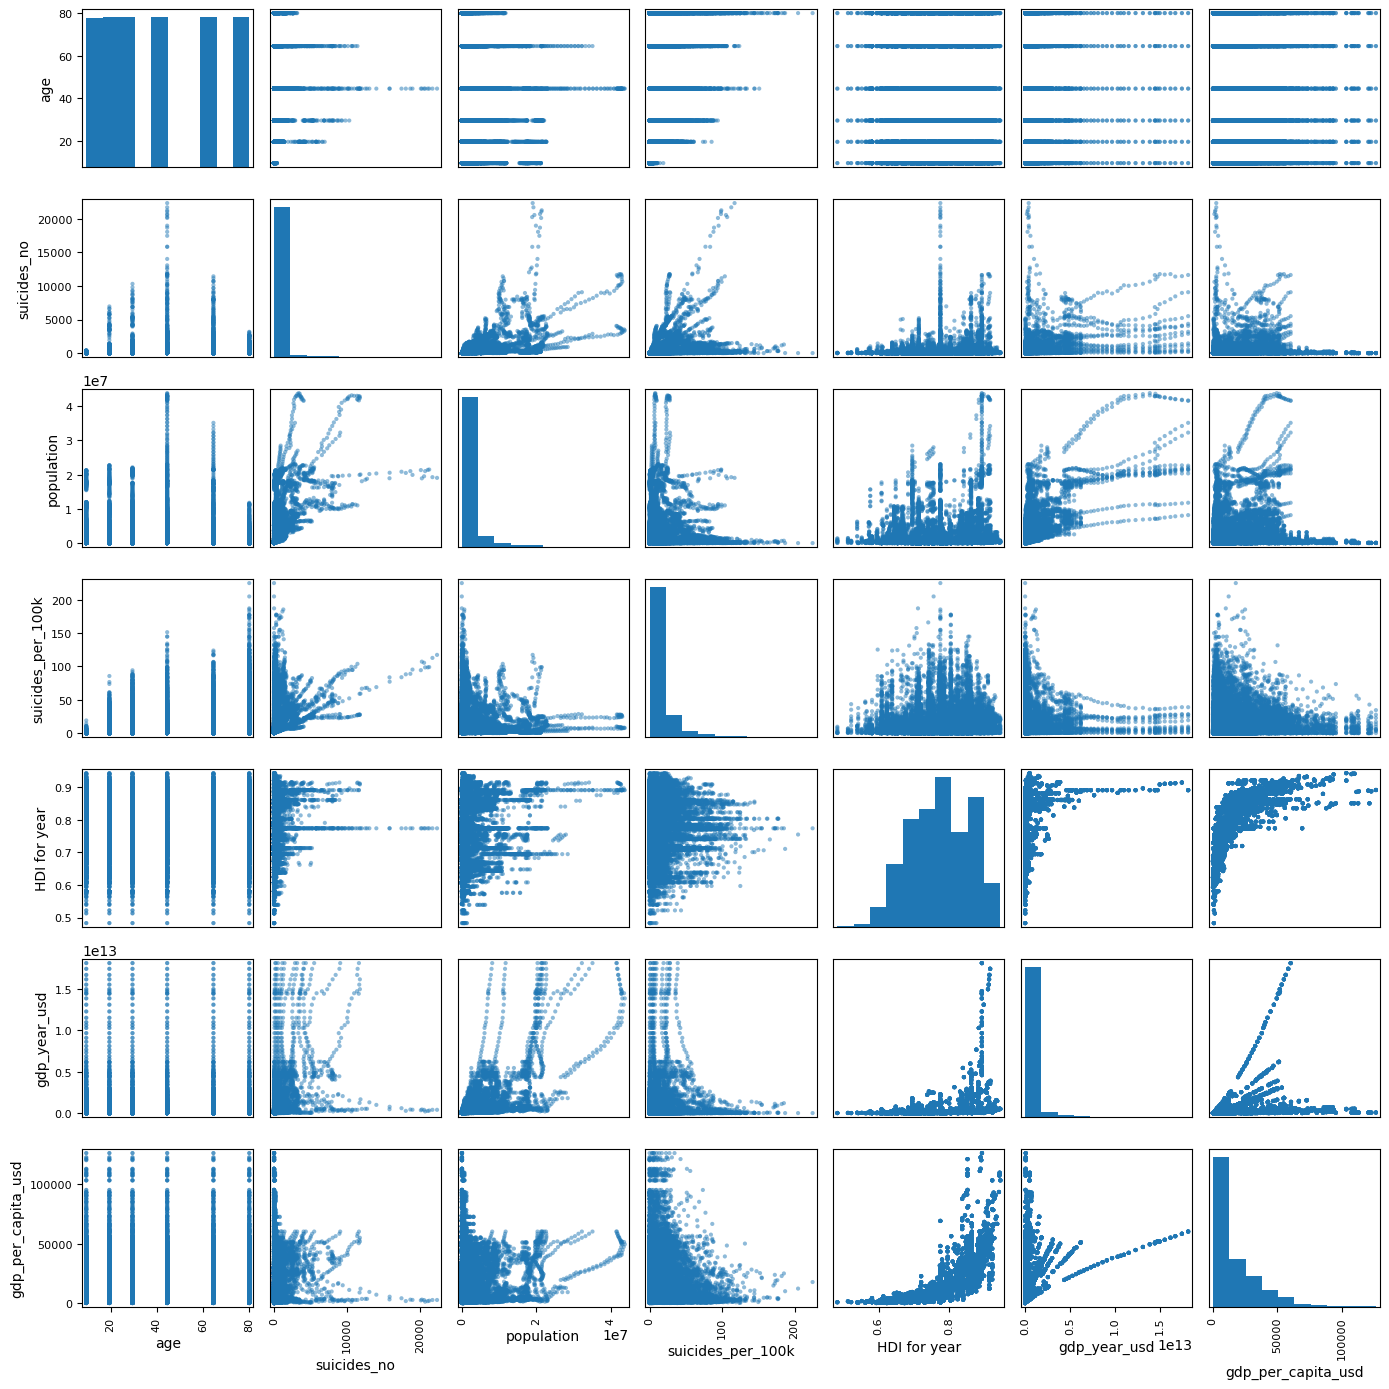

In [40]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

numeric_cols = [
    "age",
    "suicides_no",
    "population",
    "suicides_per_100k",
    "HDI for year",
    "gdp_year_usd",
    "gdp_per_capita_usd"
]

plt.figure(figsize=(14, 14))
scatter_matrix(df_clean[numeric_cols], figsize=(14, 14), diagonal='hist')
plt.tight_layout()
plt.show()


In [42]:
df_clean[numeric_cols].describe()

,age,suicides_no,population,suicides_per_100k,HDI for year,gdp_year_usd,gdp_per_capita_usd
count,27820.00000,27820.000000,2.782000e+04,27820.000000,27820.000000,2.782000e+04,27820.000000
mean,41.28652,242.574407,1.844794e+06,12.816097,0.774271,4.455810e+11,16866.464414
std,24.72942,902.047917,3.911779e+06,18.961511,0.085048,1.453610e+12,18887.576472
min,9.50000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,19.50000,3.000000,9.749850e+04,0.920000,0.713200,8.985353e+09,3447.000000
50%,44.50000,25.000000,4.301500e+05,5.990000,0.774271,4.811469e+10,9372.000000
75%,64.50000,131.000000,1.486143e+06,16.620000,0.849000,2.602024e+11,24874.000000
max,80.00000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


C:\Users\annaf\AppData\Local\Temp\ipykernel_19732\3638681041.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_clean[numeric_cols], labels=numeric_cols, vert=True)


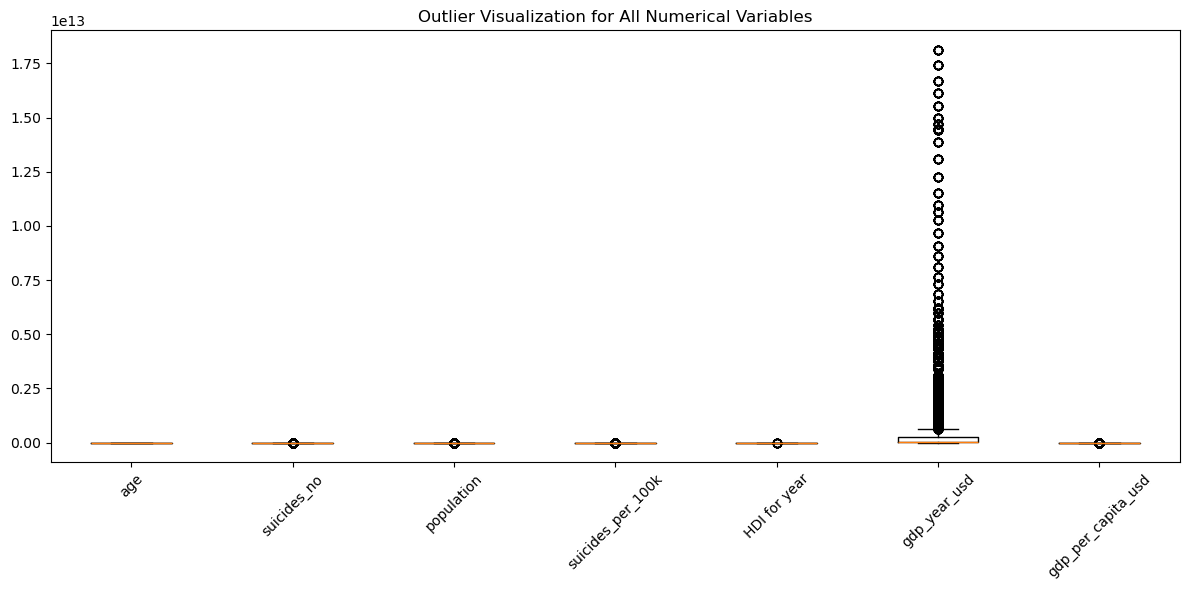

In [43]:
import matplotlib.pyplot as plt

numeric_cols = [
    "age",
    "suicides_no",
    "population",
    "suicides_per_100k",
    "HDI for year",
    "gdp_year_usd",
    "gdp_per_capita_usd"
]

plt.figure(figsize=(12, 6))
plt.boxplot(df_clean[numeric_cols], labels=numeric_cols, vert=True)
plt.title("Outlier Visualization for All Numerical Variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
df_no_outliers = df_clean.copy()

numeric_cols = [
    "age",
    "suicides_no",
    "population",
    "suicides_per_100k",
    "HDI for year",
    "gdp_year_usd",
    "gdp_per_capita_usd"
]

for col in numeric_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_no_outliers = df_no_outliers[
        (df_no_outliers[col] >= lower) &
        (df_no_outliers[col] <= upper)
    ]

print("Righe originali:", len(df_clean))
print("Righe dopo rimozione outlier:", len(df_no_outliers))


Righe originali: 27820
Righe dopo rimozione outlier: 16098
